# Chapter 5. 정규선형모델

## 5.2 분산분석

* 분산분석은 정규선형모델에서 폭넓게 이용되는 검정 방법

* 고전적인 일원배치 분산분석 확인 후 정규선형모델에서 분산분석의 위상 확인

### 5.2.1 이 절의 예제

* 종속변수로는 매상, 독립변수로는 날씨 사용

* 고전적인 일원배치 분산분석의 예제 

    - 날씨에 따라 매상이 변화한다고 말할 수 있는지 검정으로 조사

### 5.2.2 분산분석이 필요한 시기

* **분산분석** 은 평균값의 차이를 검정하는 방법, 특히 세 개 이상의 수준 간의 평균값에 차이가 있는지 검정

    - 예: 맑음, 비, 흐림 등 날씨가 변함에 따라 매상이 변한다고 말할 수 있는가와 같이 세 개 이상의 수준(level)을 가진 데이터가 대상이 됨

    - **(주의)** : 모집단이 정규분포를 따르는 데이터에 대해서만 적용, 수준 사이 등분산 가정

### 5.2.3 검정의 다중성

* **검정의 다중성** : 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제

    * 유의수준을 0.05라고 정하고 검정을 할 경우, 제1종 오류를 저지를 확률은 5%. 

    * 이때, 검정을 2회 연속하였을 경우 각 검정에 있어서 유의수준은 0.05, 어느 한쪽의 검정에 대해서라도 귀무가설을 기각할 수 있다면 대립가설을 채택한다는 규칙으로 검정을 시행할 경우 제1종 오류가 발생할 확률은 1 - (0.95 x 0.95) = 0.0975가 되어 거의 10%가 됨

    * 검정을 반복하면 귀무가설이 기각되기 쉬워지고 제1종 오류를 저지를 확률이 높아짐 

    * 예를 들어, 맑음 대 비, 비 대 흐림, 흐림 대 맑음의 3가지 조합으로 t 검정을 실시하면 검정의 다중성 문제가 발생함

* 분산분석을 하게 되면 맑음이나 비와 같은 개별 카테고리를 보는 것이 아니라 날씨에 따라 매상이 다른지 어떤지 한 번의 검정으로 판단할 수 있게 됨

### 5.2.4 분산분석의 직감적 사고방식: F비 

* 분산분석의 귀무가설과 대립가설

    - 귀무가설: 수준 간의 평균값에 차이가 없다.
    
    - 대립가설: 수준 간의 평균값에 차이가 있다.
    
    - 여기서 수준(level)이란 날씨, 물고기의 종류 등과 같은 카테고리형 변수를 가리킴
    
* 분산분석에서는 데이터의 변동을 **오차**와 **효과**로 분리함

    - F비라는 통계량을 계산함
    
$$ F-ratio = \frac{효과의 \, 분산 \, 크기}{오차의 \, 분산 \, 크기} $$

* 예제에서 효과는 날씨에 따른 매상의 변동 / 오차는 날씨라는 변수를 이용해서 설명할 수 없는 맥주 매상의 변동

* 영향의 크기는 분산을 이용해서 정량화 함

    - **날씨에 따른 매상 변동**은 '**날씨가 변함에 따른 데이터의 흩어짐 크기**'로 표현됨

    - **오차 영향**의 크기도 마찬가지로 **잔차의 분산**을 계산함으로써 구할 수 있음


* 분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 **분산 분석**(Analysis of Variance), 줄여서 **ANOVA** 라고 불림

* **F비가 크면 오차에 비해 효과의 영향이 클 것**이라고 판단할 수 있다. 

* 모집단 분포가 등분산 정규분포일 때의 F비의 표본분포는 이미 잘 알려져 있음 (**F분포**)

    * **F분포의 누적분포함수**를 사용해서 p값을 계산하고, p값이 0.05 이하가 되면 귀무가설을 기각한다는 흐름 

    * F비의 해석과 계산 방법을 이해하면 분산 분석을 어느 정도 이해할 수 있음

### 5.2.5 유의미한 차이가 있을 때와 없을 때의 바이올린플랏

* **바이올린 간 거리** : **효과의 크기**

* **각 바이올린 폭** : **오차의 크기**

![anova.png](drawings/anova_desc1.png)

### 5.2.7 군간변동과 군내변동

* 바이올린 간의 거리, 즉 효과의 크기를 **군간변동** 이라고 부름

* 바이올린의 폭, 즉 오차의 크기를 **군내변동**이라고 부름

* **분산분석에서는 데이터의 분산을 군간변동과 군내변동 2개로 나눈 뒤 그 비율을 취한 것을 통계량으로 사용하여 검정을 시행합니다.***

### 5.2.8 분석 준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델 추정에 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 5.2.9 데이터 작성과 표시

In [2]:
# 샘플 데이터
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

# 데이터 프레임으로 모으기
weather_beer = pd.DataFrame({"beer":beer, "weather":weather})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

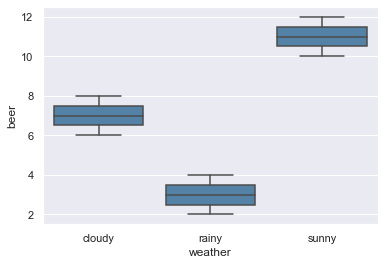

In [3]:
sns.boxplot(x = "weather", y = "beer", data = weather_beer, color = "steelblue")

<AxesSubplot:xlabel='weather', ylabel='beer'>

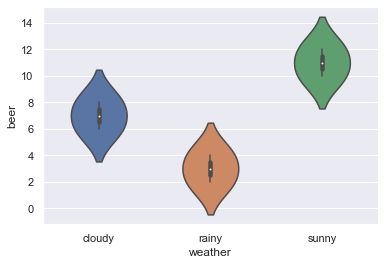

In [4]:
sns.violinplot(x = "weather", y = "beer", data = weather_beer, width = 0.5)

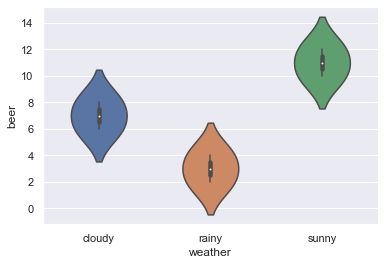

In [5]:
violin_plot = sns.violinplot(x = "weather", y = "beer", data = weather_beer, width = 0.5)
violin_fig = violin_plot.get_figure()
violin_fig.savefig('violin_plot2.png')

* 날씨별 매상의 평균치 계산

    - 비오는 날은 매상이 적고, 맑은 날은 많으며, 흐린 날은 그 중간임

In [6]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


### 5.2.10 분산분석(1): 군간 제곱과 군내 제곱 계산

In [7]:
# 패키지 사용하지 않고 계산

# 1. 날씨에 의한 영향으로서 각 날씨별 기대값 산출
weather_beer.groupby("weather").mean()

,beer
weather,
cloudy,7.0
rainy,3.0
sunny,11.0


In [8]:
# 날씨 영향에 대한 vector 생성

effect = [7, 7, 3, 3, 11, 11]

* effect의 흩어진 정도를 구함으로써 군간 변동을 구할 수 있음

    - 군간 변동의 분자에 해당하는 군간 편차제곱합 계산 
    
    - 전체 평균과 그룹 평균에 대한 편차제곱합

In [9]:
# 군간 제곱합
# 전체 평균과 그룹의 평균에 대한 편차제곱합 => squares_model

mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2) 
squares_model

64.000

* 오차는 원래 데이터에서 효과를 빼는 것으로 계산

In [10]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

* 군내 편차제곱합 구하기 (그룹 내 편차 제곱)

In [11]:
# 군내 제곱합
squares_resid = np.sum(resid ** 2)
squares_resid

6

### 5.2.11 분산분석(2): 군간 분산과 군내 분산 계산

* 표본분산을 계산할 때 편차제곱합을 샘플사이즈로 나누어 구함

    * 불편분산을 계산하는 경우, 샘플사이즈에서 1을 빼서 나눔


* 마찬가지로 분산분석에서도 군간, 군내 분석을 계산할 때의 분모는 자유도로 나누어야 함!

    - 군(그룹) 간 변동의 자유도는 수준(lv)의 종류 수에 따라 좌우됨
    
    - 흐림, 비, 맑음의 3가지 수준에서 1을 빼면 군간 변동의 자유도는 2가 됨
    
    - 군내변동의 자유도는 샘플사이즈와 수준의 종류 수에 따라 좌우됨. 샘플 사이즈가 6이고 수준의 종류수가 3이므로 6-3 = 3이 군내변동의 자유도가 됨 


* **군간 변동의 자유도** : df_model , **군내 변동의 자유도** : df_resid

In [12]:
df_model = 2 # 그룹간 변동의 자유도
df_resid = 3 # 그룹 내 변동의 자유도

* **그룹 간 분산** 

In [13]:
# 그룹(군) 간 평균제곱(분산)
variance_model = squares_model / df_model
variance_model

32.000

In [14]:
# 그룹(군) 내 평균제곱(분산)
variance_resid = squares_resid / df_resid
variance_resid

2.000

### 5.2.12 분산분석(3): p값 계산

* F비와 p값 계산

    - F-비는 군(그룹) 간 분산과 군(그룹) 내 분산의 비로 계산

In [15]:
f_ratio = variance_model / variance_resid
f_ratio

16.000

* p값은 F분포의 누적분포함수에서 계산

    * **sp.stats.f.cdf 함수 이용 **
    
    * 파라미터로는 F비와 2개의 자유도(dfn, dfd) 사용

In [16]:
1 - sp.stats.f.cdf( x = f_ratio, dfn = df_model, dfd = df_resid)

0.025

* p값이 0.05 이하가 됐으므로 날씨에 의해 매상이 유의미하게 변화한다고 판단 가능(원래는 더 큰 샘플 사이즈 사용해야 함)

* 분산분석 정리

    - 1. 분산분석에서는 데이터를 효과의 크기와 오차의 크기로 분리
    
    - 2. 각각의 크기를 분산으로 정량화
    
    - 3. 효과의 크기를 군(그룹) 간 변동, 오차의 크기를 군(그룹) 내 변동이라고 부름
    
    - 4. 군간 분산과 군내 분산의 비율, 즉 F비를 통계량으로 사용
    
    - 5. 모집단이 등분산 정규분포를 따를 때 F비는 F분포를 따른 다는 것이 밝혀져 있기 때문에 F분의 누적분포함수에서 p값을 계산하고, 그 p값이 0.05이하인지 판정

### 5.2.13 독립변수가 카테고리형인 일반선형 모델

* 날씨에서 매상을 예측하는 일반선형 모델의 식

$맥주 매상 ~ N \left( \beta_0 + \beta_1 \times 비+ \beta2 \times 맑음 , \, \sigma^2 \right) $

* 여기서 '비'는 비가 왔을 때는 1, 그 외의 날에는 0인 변수(맑음도 동일)

* 따라서 $\beta_1$과 $\beta_2$는 각각 비와 맑음의 영향을 나타내는 파라미터가 됨

* 흐림은 비와 맑음 모두 0일 경우의 계수 $\beta_0$

### 5.2.14 더미변수

* 카테고리형 변수를 모델에 넣을 때 사용하는 것이 **더미변수**

* 예를 들어 비일 때 1이고, 그 외에는 0인 변수가 더미변수

    - 딥러닝 쪽에선 one-hot encoding 이라는 표현을 사용


* 다만, statsmodels를 사용해서 모델링을 하는  경우에는 더미변수의 존재를 의식할 일이 그다지 없음(단순회귀모델과 같은 방식으로 모델링 가능)

### 5.2.15 statsmodels를 이용한 분산분석

* 앞서 일원배치 분산분석을 실시한 데이터를 일반선형모델의 구조로 모델링

* 독립변수가 연속형 변수든 카테고리형 변수든 smf.ols를 사용해서 모델링하는 것은 변함 없음

In [17]:
anova_model = smf.ols("beer ~ weather", data = weather_beer).fit()

* 한 번 모델링해두면 간단히 분산분석을 실행할 수 있음

* **```sm.stats.anova_lm```** 함수 사용

In [18]:
print(sm.stats.anova_lm(anova_model, typ = 2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


> **(함수 설명)** https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html

### 5.2.16 분산분석표

* sm.stats.anova_lm 함수의 결과로 출력된 표의 형식을 **분산분석표**

    * 분산분석표 내에는 그룹 간, 그룹 내 편차제곱합 sum_sq, 자유도 df 그리고 F비와 p값이 정리됨


* 이 표만 보더라도 샘플사이즈나 수준의 개수를 알 수 있음

### 5.2.17 모델의 계수 해석

* 추정된 모델의 계수 표시

In [19]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

* 모델의 식과 어떻게 대응되는지 확인 
$$맥주 매상 ~ N \left( \beta_0 + \beta_1 \times 비+ \beta2 \times 맑음 , \, \sigma^2 \right) $$

* Intercept는 $\beta_0$에 대응함. 그러므로 흐린 날의 매상 평균은 7이 되며, 

* 비오는 날에는 계수 weather[T.rainy]가 더해져 (7-4 = 3) 매상의 기댓값은 3이 되며,

* 맑은 날에는 4가 더해져 매상의 기댓값은 11이 된다.

### 5.2.18 모델을 사용해서 오차와 효과 분리하기

* 추정된 모델의 계수를 이용해서 훈련 데이터에 적용한 결과를 확인

In [20]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

* 적용 결과는 각 수준의 평균값과 일치함

* 독립변수를 카테고리형 변수로 한 일반 선형 모델의 예측치는 각 수준의 평균값과 일치

* 적용한 결과값(fitted value)과 실제 데이터의 차이가 잔차 -> anova_model.resid 코드로 확인 가능

In [21]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

### 5.2.19 회귀모델의 분산분석

* 분산분석이라는 검정 방법은 일반선형모델에서 일반적으로 사용 가능

* 이는 독립변수가 연속형 데이터여도 변함 없음

In [22]:
# 데이터 읽어 들이기
beer = pd.read_csv("py_source/5-1-1-beer.csv")

# 모델 추정
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

* 독립변수가 카테고리형 변수라고 대하도 모델의 적용값과 잔차를사용해서 F비를 계산할 수 있음 

* **(자유도)** 독립변수가 연속형 데이터인 경우 그룹 간 변동이나 그룹 내 변동이라는 용어는 잘 사용되지 않음

    - 군간변동의 자유도를 **모델의 자유도** : 추정된 파라미터 수에서 1을 뺀 값 (예: 2(기온, 절편) - 1)
    
    - 군내변도의 자유도를 **잔차의 자유도** : 샘플사이즈에서 추정된 파라미터의 수를 뺀 값 (예: 30 - 2(기온, 절편))

In [23]:
# 모델의 자유도
df_lm_model = 1

# 잔차의 자유도
df_lm_resid = 28

* F비 계산 

In [24]:
# 모델을 적용한 값
lm_effect = lm_model.fittedvalues

# 잔차
lm_resid = lm_model.resid

# 기온의 효과 크기 (기온에 의한 추정치의 편차 제곱합), SSE
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model

# 잔차의 크기, SSR
squares_lm_resid = np.sum((lm_resid) **2)
variance_lm_resid = squares_lm_resid / df_lm_resid

# F비
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.447

* 이 F비를 사용해서 p값을 계산해도 괜찮지만, 숫자가 작기 때문에 거의 0이 되어 버림

* 분산분석표를 출력함(F비의 계산 결과가 일치한다는 것을 확인)

In [25]:
print(sm.stats.anova_lm(lm_model, typ = 2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


* 이 결과의 일부는 모델의 summary 함수에도 출력됨

In [26]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        19:15:22   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* F-statistic 이 F비 , 그 밑에 있는 Prob(F-statistic)이 분산분석의 p값을 보여줌

* 독립변수가 1개인 경우에는 계수의 t검정 결과와 분산분석의 결과가 일치함

* 단, 독립변수가 늘어나면 일치하지 않게 됨